# **Super Store Profit Analysis**

Contents:

1.	Introduction

2.	Question

    * Descriptive Analysis
      
    * Diagnostic Analysis
          
    * Predictive Analysis

3.	Dataset Description
  
4.	Data Inspection and Cleaning

    * Data Import
      
    * Missing Values Treatment
  
    * Duplicates Treatment
  
    * Outliers Treatment

5. Descriptive Analysis

    * Customer Segment
    
    * Product Category
  
    * Monthly Profit Trend 
   
6. Diagnostic Analysis

   * Profit Loss
     
   * Customer Segment
  
   * Product Category
  
   * Monthly Profit

7. Predictive Analysis

8. Conclusions

## **1. Introduction**

The objective of this project is to enable Super Store to evaluate their financial performance, identify profit trends, and make data-driven decisions to enhance profitability.  This report presents profit gain/loss analysis based on six months worth of Super Store's transactional data, focusing on descriptive, diagnostic, and predictive analysis.  

The project begins with Descriptive Analysis by exploring the fundamental profit metrics.  These metrics encompass the maximum and minimum profit recorded, variations in profit across customer segments, product categories generating the most profit, and monthly profit trends.

Next, Diagnostic Analysis focuses on examining factors contributing to profit variation and loss.  Profit loss analysis investigates whether the business experienced more profit loss or profit gain and identifies product category and sub-category responsible for the majority of the profit loss.  Customer Segment analysis probes into profit variation between customer segment by region, state, and city and examines the correlation between customer segment and profit. Product category analysis considers profit variations by customer segment on the product category with the highest profit and investigates the correlation between product category and profit.  Furthermore, monthly profit analysis focuses on identifying the elements responsible for the month with the worst profit performance, exploring monthly profit consistency across the different regions, and delving into the correlation between the month and profit.

Lastly, Predictive Analysis utilizes machine learning algorithms to forecast profit outcomes.  Random Forest Classifier was trained to classify transactions as profit gains/losses.

Through this analysis, we are looking to shed light into key profit drivers and profit loss pattern in order to help Super Store derive business strategies to optimize financial performance on high performing customer segments, product categories, and regions and improve the ones with mediocre or poor performance.  Additionaly, we are also looking to develop a tool to enable data driven predictions that can support strategic decision-making.

## **2. Questions**

Business Questions to be answered for the analysis are as follows:

### **Descriptive Analysis**
* What is the maximum and minimum profit?
* How does the profit vary between customer segments?
* Which product category generates the most profit?
* What are the monthly profit trends?

### **Diagnostic Analysis**

### **Profit Loss**
* Over the period of 6 month, is there more profit loss compared to profit gain?
* Which product category contributed to majority of the profit loss? 
* For each product category, which product sub-category contributed the most profit loss?

### **Customer Segment**
* For each customer segment, how does the profit vary in each region, state, and city?
* Is there a relationship between customer segment and profit?

### **Product Category**
* For the product category that generated the most profit, how does profit vary between the customer segments?
* Is there a relationship between product category and profit?

### **Monthly Profit** 
Since we noticed that profit is at the lowest in March, we decided to investigate further for possible factors responsible for the poor performance by asking the first 3 questions focusing on the month of March.

* Which region contributed the most profit loss in the month of March? 
* Which customer segment contributed the most profit loss in the month of March? 
* Which product category contributed the most profit loss in the month of March? 
* Are monthly profit consistent across the different regions?
* Is there a correlation between the month and profit?

### **Predictive Analysis**
* What is the accuracy of a trained Random Forest Classifier in forecasting profit gain or loss?


## **3. Dataset Description**

For our analysis we used a customer order transaction dataset consisting the following attributes:

| Attributes  | Description |
|---------|------------|
|Order ID | Unique identifier for each transaction |
| Order Date |  The dates when the order was placed |
| Ship Date | The dates when the order was shipped |
| Customer ID | Unique identifier for each customer |
| Customer Name | The name of the customer (optional depending on privacy)|
| Segment | Type of customer (e.g., Consumer, Corporate, Home Office) |
| Country/Region/City | Geographic location of the sale |
| State | Specific state or province |
| Product ID | Unique identifier for each product |
| Product Category | High-level grouping (e.g., Office Supplies, Technology, Furniture) |
| Sub-Category | More detailed product category |
| Product Name | Description of the product sold |
| Sales | Total revenue generated from the transaction |
| Quantity | Number of units sold |
| Discount | Applied discount rate for the transaction |
| Profit | Profit margin of the sale |
| Shipping Mode | The type of shipping selected (e.g., Standard, Express) |

## **4. Data Inspection & Cleaning**

### **Data Import**

We began our analysis by importing the customer order transaction data and modifying the feature names for ease of analysis.

Please refer to the code cells below for the data import and feature names modification.

In [1170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Importing the observations to a pandas dataframe
super_store_df = pd.read_excel('super_store_order.xlsx')

In [1171]:
# Modifying column names for ease of coding and analysis
modified_col_names = []
col_name = '' 

for item in list(super_store_df.columns):
    col_name = item.replace(' ', '_')
    col_name = col_name.lower()
    modified_col_names.append(col_name)

super_store_df.columns = modified_col_names

In [1172]:
# Giving a column a simpler name
super_store_df.rename(columns={'quantity_ordered_new':'quantity'},inplace=True)

### **Missing Values Treatment**

Missing values in the dataset can serve as an obstacle for when we need to derive insights from our descriptive, diagnostic, and predictive analysis.  

We began dealing with missing values by calculating their percentages in each of the features in the dataset.  

Please refer to the code cell below for missing values checks.

In [1173]:
# Calculate the percentage of null values per column to check for missing values in the features columns
null_percentage = (super_store_df.isnull().sum() / len(super_store_df)) * 100

print("Percentage of Null Values Per Column:")
print(null_percentage)

Percentage of Null Values Per Column:
customer_name           0.000000
customer_id             0.000000
row_id                  0.000000
order_priority          0.000000
discount                0.000000
unit_price              0.000000
shipping_cost           0.000000
ship_mode               0.000000
customer_segment        0.000000
product_category        0.000000
product_sub-category    0.000000
product_container       0.000000
product_name            0.000000
product_base_margin     0.819672
country                 0.000000
region                  0.000000
state_or_province       0.000000
city                    0.000000
postal_code             0.000000
order_date              0.000000
ship_date               0.000000
profit                  0.000000
quantity                0.000000
sales                   0.000000
order_id                0.000000
dtype: float64


After calculating the percentages of the missing values, we found out that only ~0.82 percent accounts for the missing values in the product base margin column.  

We then proceeded to replace the missing values in the product base margin column with the median value by product category.

Please refer to the code cell below for missing value replacements.

In [1174]:
# Replace missing values with the median value of the feature
super_store_df['product_base_margin'] = super_store_df['product_base_margin'].fillna(super_store_df.groupby('product_category')['product_base_margin'].transform('median'))

### **Duplicates Treatment**

Duplicated observations can affect insights drawn from the data points for analysis and, therefore, must be dealt with.  

We checked for duplicates by calculating the total number of duplicated observations. 

Please refer to the code cell below for duplicate checks.

In [1175]:
# Check for duplicates
total_duplicates = super_store_df.duplicated().sum()
print(f'Total duplicates: {total_duplicates}')

Total duplicates: 0


Fortunately, there were no duplicates.

So further action was not required.

### **Outliers Treatment**

Outliers can lead to bias in our analysis and need to be taken care of properly.

We dealt with outliers by visualizing them to see if there were any.  If there were outliers in the features' data points, they were extracted using the Interquartile Range and highlighted in a scatter plot. 

Please refer code cells below for the outlier analysis.

In [1176]:
def check_outliers(df, column, x_label):
    
    # Using histogram to visualize outliers
    plt.hist(df[column], bins=30, edgecolor='k')
    plt.xlabel(x_label)
    plt.ylabel('Frequency')
    plt.title('Distribution of ' + x_label)
    plt.show()
    
    # Using boxplot to visualize outliers
    plt.boxplot(df[column], vert=False)
    plt.xlabel(x_label)
    plt.title('Boxplot of ' + x_label)
    plt.show()

def extract_outliers(df, column):

    # Using quantiles to isolate outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers

def highlight_outliers(df, column, y_label, outliers):

    # Highlight outliers on a scatter plot
    plt.scatter(df.index, df[column], label='Data Points')
    plt.scatter(outliers.index, outliers[column], color='r', label='IQR Outliers')
    plt.xlabel('Index')
    plt.ylabel(y_label)
    plt.legend()
    plt.title('Outliers in ' + y_label)
    plt.show()


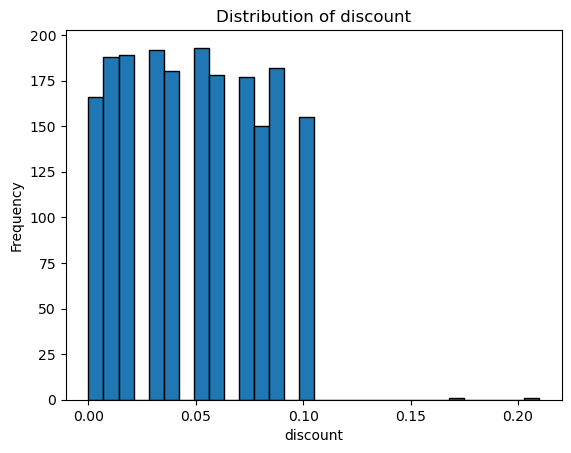

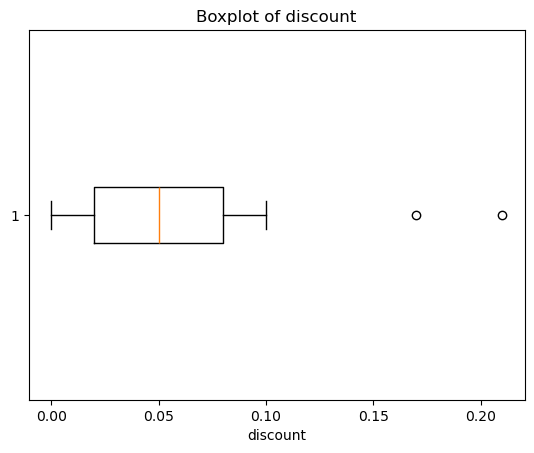

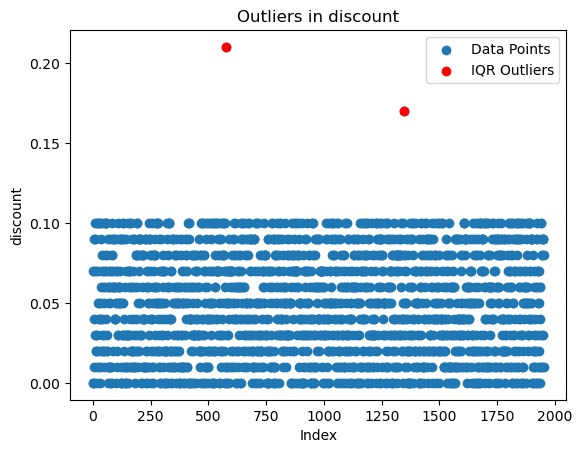

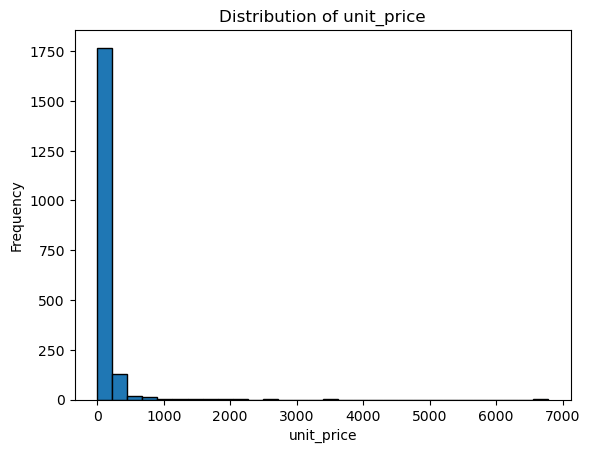

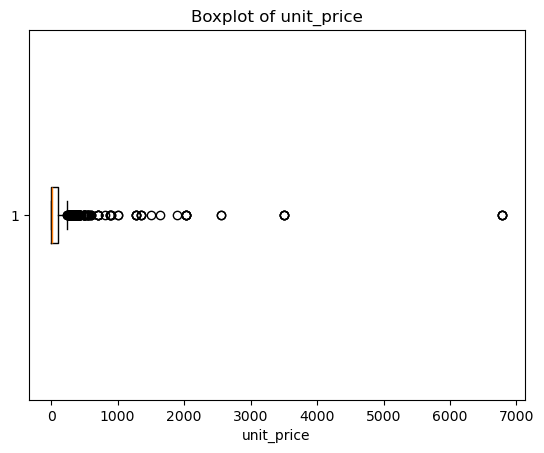

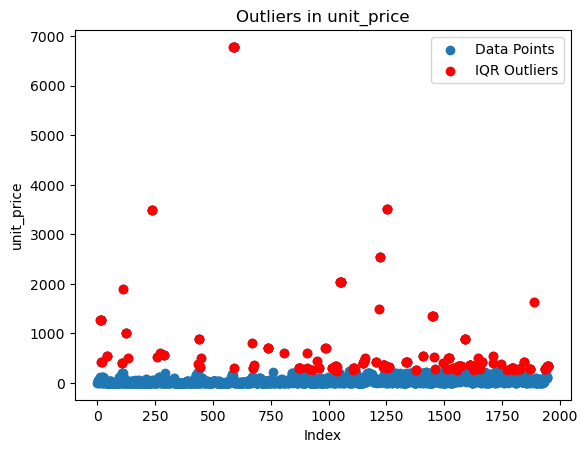

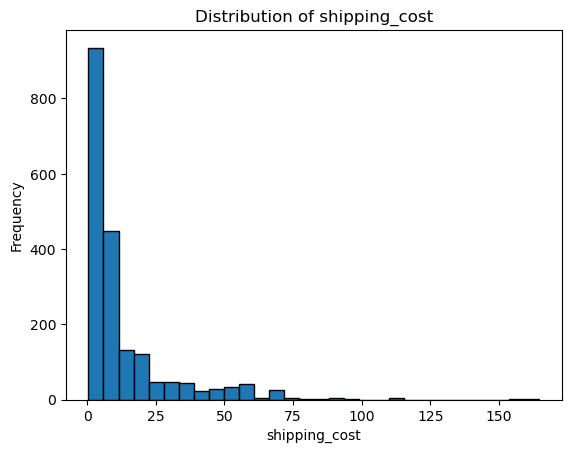

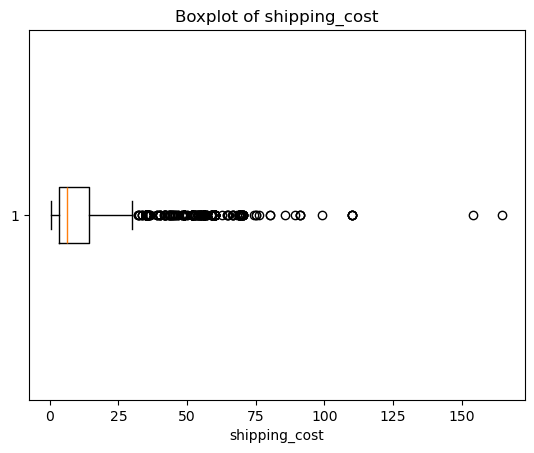

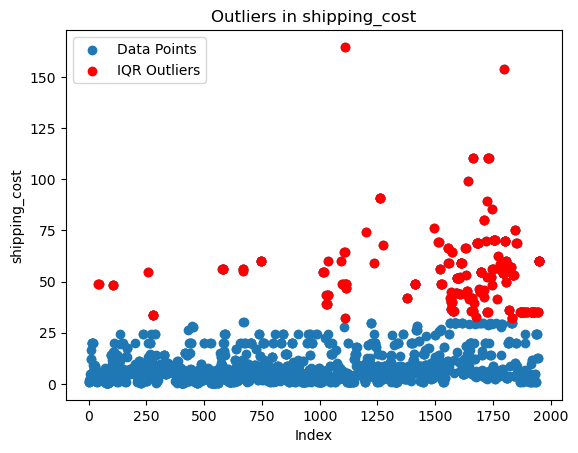

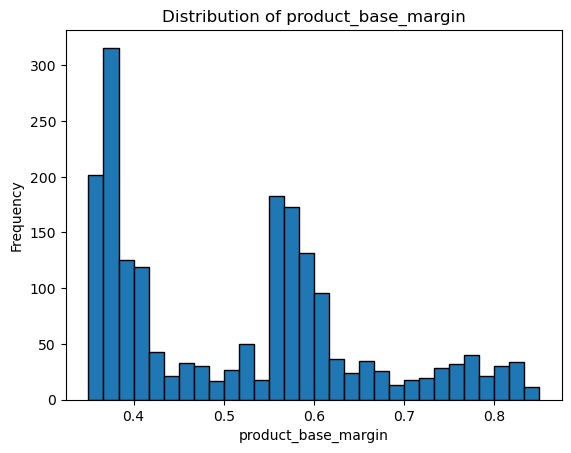

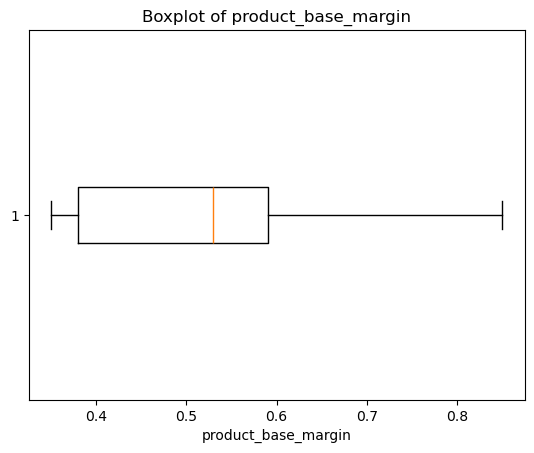

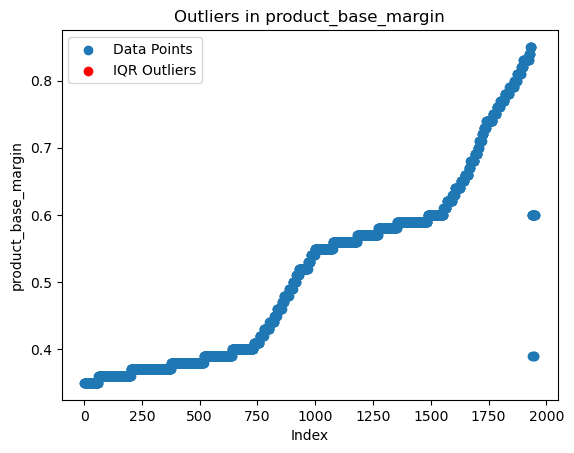

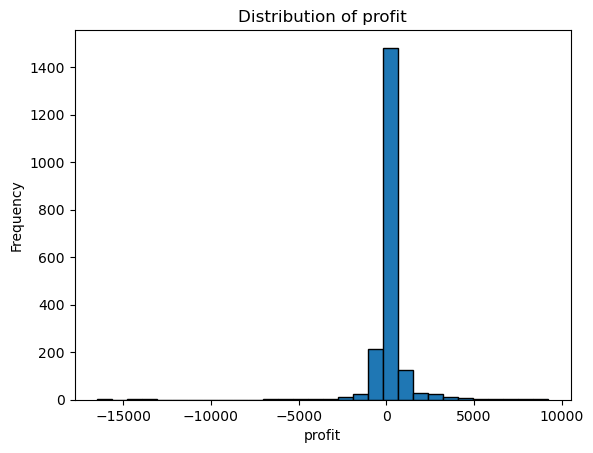

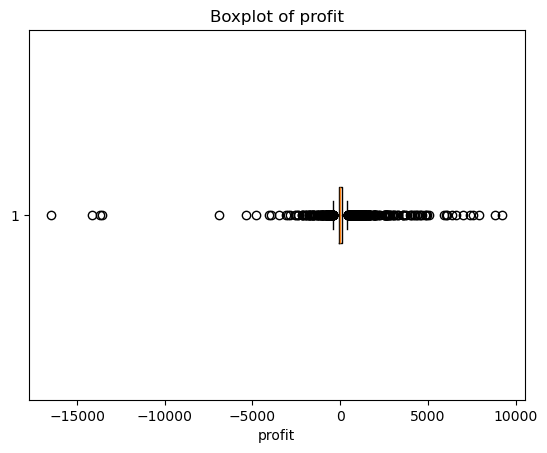

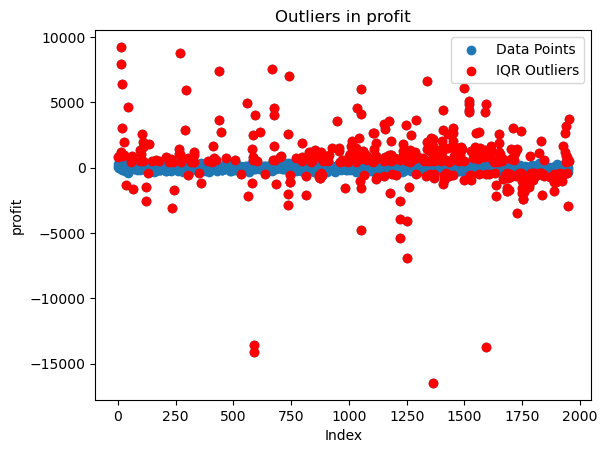

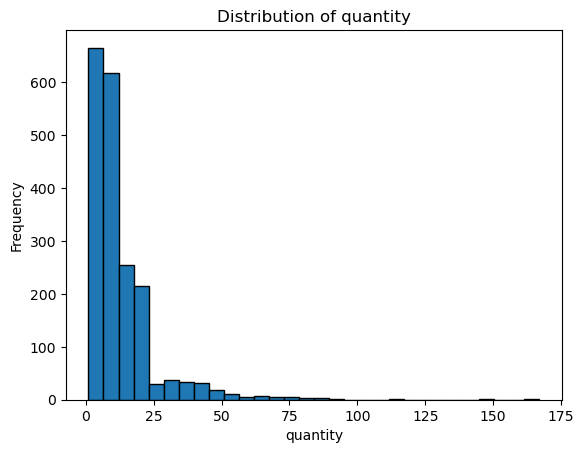

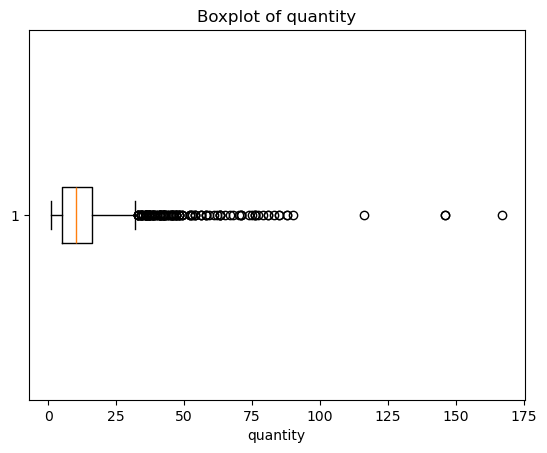

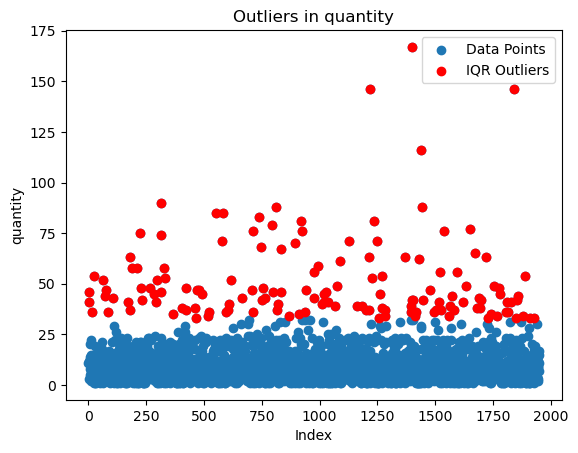

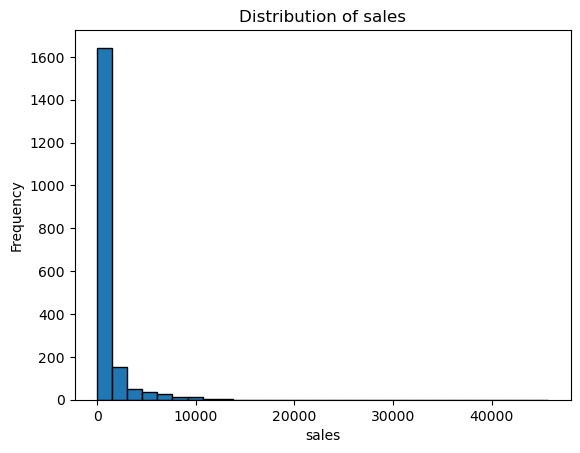

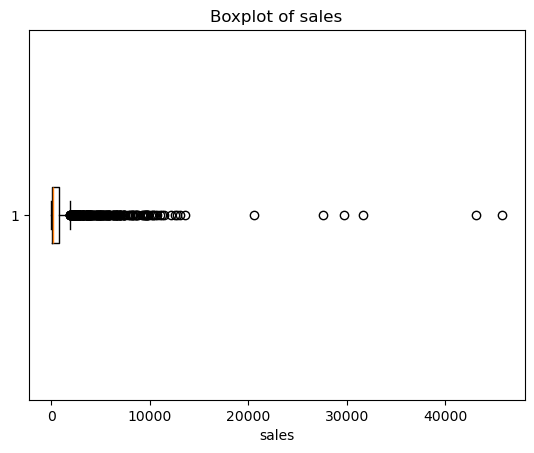

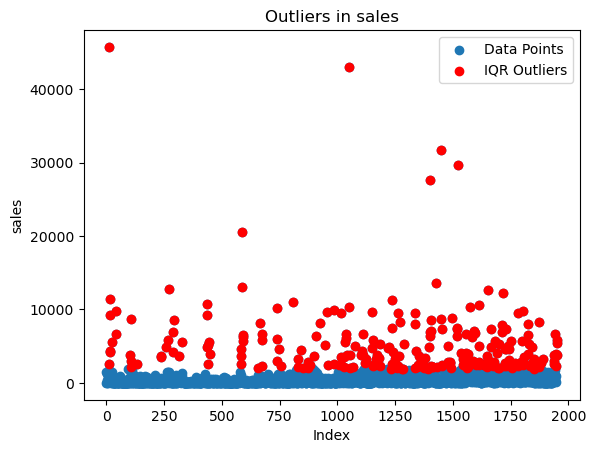

In [1177]:
# Select only numerical features to check for outliers
df_numericals = super_store_df.select_dtypes(include='number').drop(columns=['customer_id','row_id','postal_code','order_id'])

for col in list(df_numericals.columns):
    check_outliers(df_numericals, col, col)
    highlight_outliers(df_numericals, col, col, extract_outliers(df_numericals, col))


Numerical features that were deemed crucial for current and future analysis are discount, unit price, shipping cost, product base margin, profit, quantity, and sales.  Outliers were detected in all them but not in the product base margin data points.  These outliers were assumed to be acceptable and they were not data entry error after being reviewed by domain experts.  Therefore, they could be included in the next phase of the analysis.

## **5. Descriptive Analysis**

We started our descriptive analysis by a simple observation on maximum and minimum profit to understand if profit loss occurred in the period of 6 months.

In [1178]:
# Identifying maximum and minimum profit for the entire 6 months
max_profit = round(super_store_df['profit'].max(),2)
min_profit = round(super_store_df['profit'].min(),2)

print(f'Maximum profit: {max_profit}')
print(f'Minimum profit: {min_profit}')

Maximum profit: 9228.23
Minimum profit: -16476.84


When the maximum and minimum profit have been identified, we noticed the **significant profit loss** in the amount of **16,476 USD** and felt necessary to re-check distribution of the profit value. 

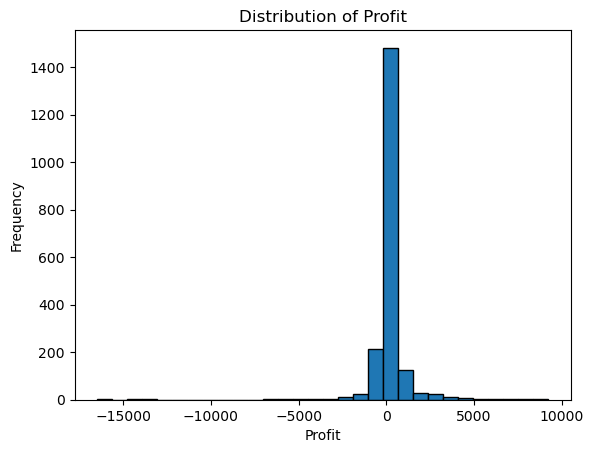

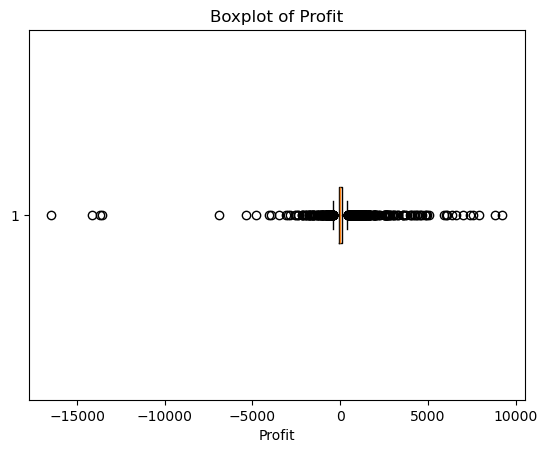

In [1179]:
# Re-checking profit data point outliers
check_outliers(super_store_df, 'profit', 'Profit')

After visualizing the profit data distribution, we realized that there were more than one transactions that resulted in profit losses and decided to separate transactions resulted in profit gains from those resulted in losses.

By segregating the gains and losses, we had the opportunity to perform a more in-depth analysis on the losses and gain a better understanding from the profit gain analysis.

We focused on the examination of the profit gain at this stage and left the profit loss for the next phase of the analysis.

In [1180]:
# Splitting profit gain from loss
profit_loss = super_store_df[super_store_df['profit'] <= 0]
profit_gain = super_store_df[super_store_df['profit'] > 0]

### **Customer Segment**

To begin the profit gain analysis, we observed how the customer segments vary in terms of profit gain and investigated which customer segment had the largest estate in terms of generating profit. 

In [1181]:
# Aggregating the profit data by customer segment
prof_cust_seg = profit_gain.pivot_table(index='customer_segment', values='profit', aggfunc='sum')

prof_cust_seg

,profit
customer_segment,
Consumer,102603.870780
Corporate,177704.429920
Home Office,125130.183046
Small Business,110087.167880


In [1182]:
prof_cust_seg['profit'] = round(prof_cust_seg['profit'],2)

prof_cust_seg

,profit
customer_segment,
Consumer,102603.87
Corporate,177704.43
Home Office,125130.18
Small Business,110087.17


In [1183]:
prof_cust_seg.rename(columns={'profit':'total_profit'}, inplace=True)

prof_cust_seg

,total_profit
customer_segment,
Consumer,102603.87
Corporate,177704.43
Home Office,125130.18
Small Business,110087.17


In [1184]:
prof_cust_seg_pctg = round((prof_cust_seg/prof_cust_seg['total_profit'].sum()) * 100, 2)

prof_cust_seg_pctg = prof_cust_seg_pctg.sort_values(by='total_profit', ascending=False)

prof_cust_seg_pctg

,total_profit
customer_segment,
Corporate,34.47
Home Office,24.27
Small Business,21.35
Consumer,19.90


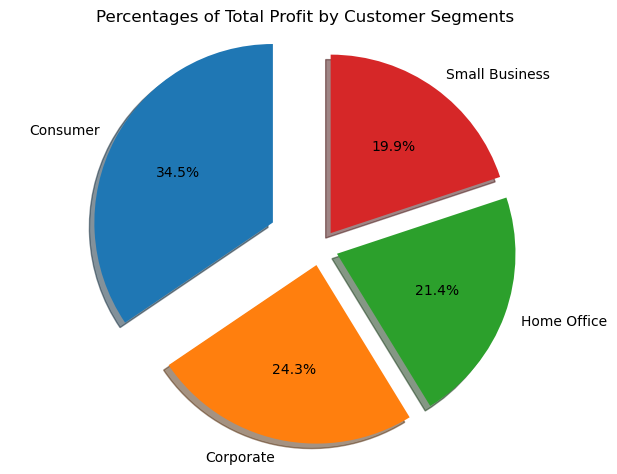

In [1185]:
chart_labels = list(prof_cust_seg.index)

fig1, ax1 = plt.subplots()
    
ax1.pie(prof_cust_seg_pctg['total_profit'], labels=chart_labels, 
        explode=(0.3,0.1,0.1,0.1), autopct='%1.1f%%', shadow=True, startangle=90)
    
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
plt.title(label='Percentages of Total Profit by Customer Segments', fontsize=12)
    
plt.tight_layout()
    
plt.show()

We learned from the aggregated profit data by customer segment that **Corporate** segment contributed the largest profit whereas **Consumer** segment contributed the smallest.    

As for improvement in terms of increasing profit by customer segment, we recommended the followings:

**1. Expand Coverage and Marketing Efforts for Consumers**
* Since the **Consumer** segment has the lowest profit share (19.9%), evaluate whether this is due to **low sales volume** or **low margins**.
* **Strategies to increase profit:**
  * **Targeted promotions:** Offer discounts, bundles, or loyalty programs to attract more Consumer customers.
  * **Upselling & cross-selling:** Encourage consumers to purchase complementary products.
  * **Improve customer retention:** Implement better customer engagement tactics, such as personalized recommendations, email marketing, or exclusive deals.

**2. Strengthen Home Office & Small Business Segments**
* Small Business (21.4%) and Home Office (24.3%) contribute moderately to total profits, meaning there's growth potential.
* **Strategies to boost profitability:**
    * **Partnerships & B2B sales:** Collaborate with small businesses by offering **bulk discounts**, supplier deals, or financing options.
    * **Subscription-based services:** Provide recurring product delivery or membership models to encourage long-term engagement.
    * **Improve product mix:** Identify and promote high-margin products for these segments.
      
**3. Maintain and Optimize Corporate Segment (34.5%)**
* Since **Corporate is the most profitable** segment, continue to strengthen relationships with corporate clients.
* **Strategies to sustain and grow profits:** Exclusive corporate deals: Offer contract-based pricing and premium services.
* **Consultative selling:** Provide customized business solutions to drive repeat purchases.
* **Increase service-based offerings:** Introduce value-added services like training, installation, or extended warranties.
  
**4. Explore Geographic Expansion**
* If data shows regional variations, expand into **high-potential areas** where Consumer and Small Business segments are underserved.
* Use **market research and customer analytics** to identify locations with demand but low competition.

**5. Optimize Pricing and Margins**
* **Evaluate the pricing strategy for each segment:** Increase profit margins without impacting sales.
* Consider **tiered pricing models** based on order volume.
* Optimize discount structures to maximize **profit per sale**.

**6. Improve Customer Experience**
* Invest in **better service**, **faster delivery**, and **personalized customer support** to drive higher retention rates across all segments.

### **Product Category**

For product category analysis we were looking to identify which category had the largest profit gain.

In [1186]:
# Aggregating the profit data by product category
prof_prod_cat = profit_gain.pivot_table(index='product_category', values='profit', aggfunc='sum')

prof_prod_cat['profit']=round(prof_prod_cat['profit'], 2)

prof_prod_cat

,profit
product_category,
Furniture,145710.99
Office Supplies,166845.65
Technology,202969.01


In [1187]:
prof_prod_cat.rename(columns={'profit':'total_profit'}, inplace=True)

prof_prod_cat

,total_profit
product_category,
Furniture,145710.99
Office Supplies,166845.65
Technology,202969.01


In [1188]:
import plotly.express as px

prof_prod_cat.reset_index(inplace=True)

# Generate Tree Map
fig = px.treemap(prof_prod_cat,  
                 values="total_profit",
                 path=['product_category'],
                 title="Total Profit by Product Category")
fig.show()

Overall, the product category profit gain analysis showed Technology contributing the most profit whereas Funiture contributed the least.

We recommended the following actions for business sustainability and improvements from product category marketing prioritization perspective:

**1. Strengthen Technology Category (Maintain Growth & Market Share)**
Since Technology drives the majority of profits, marketing should focus on retaining and expanding this segment:

* **Upsell and Cross-Sell:** Promote complementary products (e.g., laptops + accessories, software + services).
* **Exclusive Deals for Loyal Customers:** Implement membership perks for repeat customers in this category.
* **Leverage Seasonal Promotions:** Target back-to-school, Black Friday, and corporate procurement cycles.
* **Emphasize High-Margin Products:** Promote premium technology items that yield higher profits.

**2. Boost Office Supplies Profitability (Increase Sales Volume)**
* Office Supplies may have **lower margins**, but they are often **high-frequency purchases**.
* **Subscription & Bulk Discounts:** Offer automatic reorder options for businesses.
* **B2B Targeting:** Engage small businesses, schools, and offices with corporate plans.
* **Bundle Promotions:** Combine office supplies with tech products (e.g., printer + ink, desk + chair).

**3. Improve Furniture Category Performance (Enhance Profitability)**
* If Furniture has **lower profitability**, check whether it's due to **low sales** or **high costs**.
* **Highlight Ergonomic and Premium Offerings:** Showcase high-end office furniture as a productivity investment.
* **Increase Online Visibility:** Use AR/VR tools to help customers visualize furniture placement.
* **Flexible Payment Plans:** Offer financing options to increase conversions.
  
**4. Adjust Marketing Budget Allocation**
* Allocate **40-50% of marketing spend** to Technology (where ROI is highest).
* Invest **30% in Office Supplies** to increase order frequency.
Dedicate **20-30% to Furniture**, focusing on premium branding and strategic discounting.

**5. Explore New Channels for Promotion**
* **Targeted Digital Advertising:** Use paid search and social media to focus on **tech-savvy professionals** and businesses.
* **Influencer and Affiliate Marketing:** Partner with industry experts to endorse technology and office products.
* **Email and Loyalty Campaigns:** Engage existing customers with personalized offers.







### **Monthly Profit Trend**

In a 6 month period, we wanted to learn the profit trend to see how consistent the monthly performances were around the monthly average profit gain.

In [1189]:
# Extracting the months of the order dates and store them in new month column
profit_gain.loc[:,'month'] = profit_gain['order_date'].dt.month

/var/folders/8m/d4128c8n0kg6v4lp0_h_z7b00000gn/T/ipykernel_981/3097714693.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1190]:
def get_month(num):
    #Fetching the month names
    months = [
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ]
    return months[num - 1] if 1 <= num <= 12 else None


In [1191]:
monthly_profit = profit_gain.pivot_table(index='month', values='profit', aggfunc='sum')

monthly_profit

,profit
month,
1,76449.887600
2,77269.611640
3,72097.689400
4,108219.514016
5,89263.654855
6,92225.294115


In [1192]:
monthly_profit['profit'] = round(monthly_profit['profit'],2)

monthly_profit

,profit
month,
1,76449.89
2,77269.61
3,72097.69
4,108219.51
5,89263.65
6,92225.29


In [1193]:
monthly_profit.reset_index(inplace=True)

monthly_profit

,month,profit
0,1,76449.89
1,2,77269.61
2,3,72097.69
3,4,108219.51
4,5,89263.65
5,6,92225.29


In [1194]:
monthly_profit['month'] = monthly_profit['month'].apply(lambda x: get_month(x))

monthly_profit

,month,profit
0,January,76449.89
1,February,77269.61
2,March,72097.69
3,April,108219.51
4,May,89263.65
5,June,92225.29


In [1195]:
monthly_profit.rename(columns={'profit':'total_profit'}, inplace=True)

monthly_profit

,month,total_profit
0,January,76449.89
1,February,77269.61
2,March,72097.69
3,April,108219.51
4,May,89263.65
5,June,92225.29


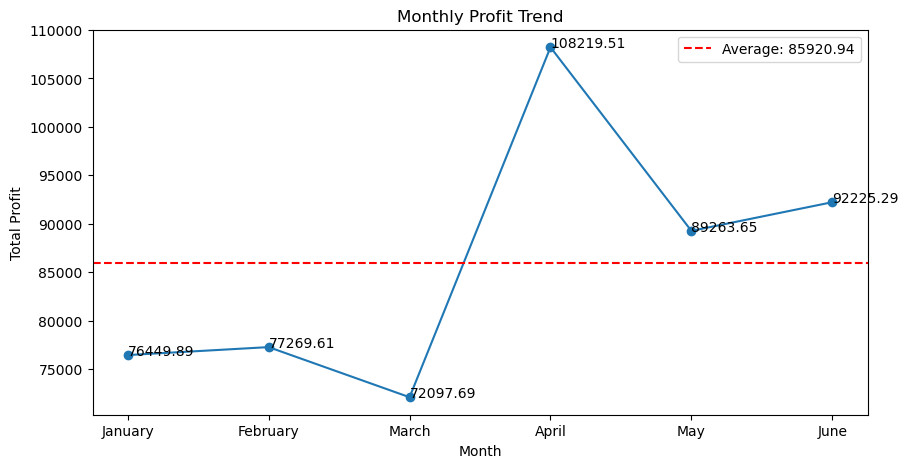

In [1196]:
# Plotting the monthly profit trend
plt.figure(figsize=(10, 5))
plt.plot(monthly_profit['month'], monthly_profit['total_profit'], marker='o')
average = round(np.mean(monthly_profit['total_profit']),2)
for i, value in enumerate(monthly_profit['total_profit']):
    plt.text(monthly_profit['month'][i], monthly_profit['total_profit'][i] + 0.5, f"{value}", ha='left')
plt.axhline(y=average, color='r', linestyle='--', label=f'Average: {average:.2f}')

plt.title('Monthly Profit Trend')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.grid(False)
plt.legend()
plt.savefig('monthly_trend.png')
plt.show()

After visualising the monthly profit gain, we realised that total profit was below average from the month January to March and above average from April to June. 

It was at an all time low in the month of March being the farthest away from the average total profit.  We felt that further analysis on this particular month needed to be conducted to understand the factors relating to a very poor performance.

## **6. Diagnostic Analysis**

### **Profit Loss**

We began our diagnostic analysis by converting all negative values in the profit loss data frame's profit column into positive values.

This is a necessary step to ensure that the profit loss data points can be captured for visualizations.

In [1197]:
profit_loss.loc[:,'profit'] = profit_loss['profit'] * -1

Now that all the values had been converted to positive, we proceeded with calculating total loss and gain to see if there were more total loss than gain.

In [1198]:
total_loss = round(profit_loss['profit'].sum(), 2)
total_gain = round(profit_gain['profit'].sum(), 2)
print(f"Total profit loss for the last 6 months: {total_loss} USD")
print(f"Total profit gain for the last 6 months: {total_gain} USD")

Total profit loss for the last 6 months: 291448.04 USD
Total profit gain for the last 6 months: 515525.65 USD


We learned that profit gain at **515525.65 USD** outweighed profit loss at **291448.04 USD** in the last 6 months.  However, **the profit loss** seemed to be **quite significant**.

With this finding in mind, we wanted to know which **product category** was responsible for the **majority of the loss**. 

In [1199]:
# Generate Tree Map
fig = px.treemap(profit_loss,  
                 values="profit",
                 path=["product_category"],
                 title="Profit Loss by Product Category")
fig.show()

Our profit loss analysis indicated that majority of the loss can be attributed to the Technology category.  

We felt it was imperative to prioritize this category for further analysis encompassing its sub-category.

In [1200]:
# Generate Tree Map
fig = px.treemap(profit_loss,  
                 values="profit",
                 path=["product_category","product_sub-category"],
                 title="Profit Loss by Product Category and Sub-Category")
fig.show()

Our drill down analysis showed Office Machines, Tables, and Storage & Organization contributed the highest profit loss for Technology, Furniture, and Office Supplies category respectively.

Based on our findings,  here are **data-driven improvement suggestions** to mitigate these losses:

**1. Technology: Office Machines, Telephones & Communication, and Computer Peripherals**

**Challenges:**

* High procurement and maintenance costs.
* Possibly low sales volume or pricing pressure.
* Rapid obsolescence leading to markdowns.

**Possible Improvements:**

* **Bundle pricing:** Offer office machines and peripherals as a package deal (e.g., printers + ink, workstations + accessories).
* **Leasing or subscription models:** Convert expensive purchases (e.g., office machines) into recurring revenue streams.
* **Product lifecycle management:** Focus on faster-moving, high-demand models while clearing out older inventory efficiently.
* **Improve supplier negotiations:** Negotiate bulk purchase discounts or better return policies to reduce losses.

**2. Furniture: Tables, Bookcases, Chairs & Chairmats**

**Challenges:**

* High storage and shipping costs (bulky items).
* Seasonal fluctuations in demand.
* Potential high return rates due to size/quality concerns.

**Possible Improvements:**

* **Optimize inventory management:** Stock higher-margin furniture and reduce slow-moving inventory.
* **Enhance product quality & differentiation:** If returns are frequent due to defects, consider improving material quality.
* **Offer assembly services:** Many customers avoid bulky furniture due to complexity; providing assembly could increase perceived value.
* **Diversify sales channels:** Expand into corporate bulk sales, interior design firms, or real estate staging businesses.
  
**3. Office Supplies: Storage & Organization, Paper, Appliances, Envelopes**

**Challenges:**

* Low-margin, high-competition products.
* Price-sensitive customer base.
* High storage costs for bulk paper and appliances.

**Possible Improvements:**

* **Introduce bulk discounts & subscription plans:** Encourage repeat business with office supply subscriptions (e.g., monthly delivery of paper, envelopes).
* **Eco-friendly options:** Market recycled paper or sustainable office supplies to appeal to conscious buyers.
* **Cost reduction strategy:** Work with suppliers to optimize procurement or explore private-label product alternatives.
* **Upselling and cross-selling:** Bundle office appliances with extended warranties or maintenance plans.

**Key Takeaways:**

* **Technology:** Focus on **bundling, leasing models, and supplier cost optimizations**.
* **Furniture:** Improve **inventory control, service offerings, and pricing strategies**.
* **Office Supplies:** Implement **bulk pricing, sustainability initiatives, and supplier cost reduction strategies**.

### **Customer Segment**

Focusing back on profit gain performance, we wanted to investigate further from regional customer segment perspective.

In [1201]:
# Aggregating profit gain data points by customer segment and region
prof_cust_reg = profit_gain.pivot_table(index="customer_segment", columns="region", values="profit", aggfunc="sum")

prof_cust_reg = round(prof_cust_reg, 2)

prof_cust_reg

region,Central,East,South,West
customer_segment,,,,
Consumer,14784.85,27444.72,13970.64,46403.66
Corporate,48604.87,51334.05,19871.79,57893.72
Home Office,51744.77,31078.95,19010.83,23295.64
Small Business,29438.24,38432.83,11580.33,30635.77


In [1202]:
# Splitting the customer segment and region aggregation data frame by region
reg_df_dict = {}

for reg in list(prof_cust_reg.columns):
    reg_df_dict[reg] = prof_cust_reg[[reg]].rename(columns={reg:'total_profit'}).sort_values(by='total_profit', ascending=False)

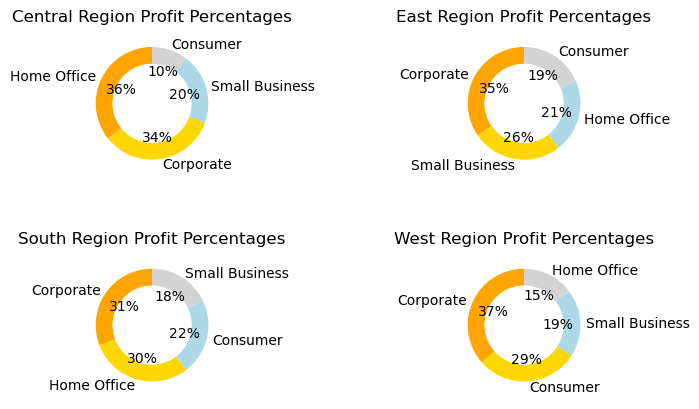

In [1203]:
# Plotting regional customer segment profit gain percentages using donut charts
colors = ['orange', 'gold', 'lightblue', 'lightgrey']

fig, ax = plt.subplots(2,2)
ax[0,0].pie((reg_df_dict['Central']['total_profit']/reg_df_dict['Central']['total_profit'].sum()) * 100,
    labels=list(reg_df_dict['Central'].index),
    colors=colors,
    autopct='%1.0f%%',
    startangle=90,
    wedgeprops={'width': 0.3}  # Adjust this to control the thickness of the donut
)

# Draw a circle at the center
center_circle = plt.Circle((0, 0), 0.7, color='white', fc='white', linewidth=0)
ax[0,0].add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax[0,0].axis('equal')
ax[0,0].set_title('Central Region Profit Percentages')

# Plot
ax[0,1].pie((reg_df_dict['East']['total_profit']/reg_df_dict['East']['total_profit'].sum()) * 100,
    labels=list(reg_df_dict['East'].index),
    colors=colors,
    autopct='%1.0f%%',
    startangle=90,
    wedgeprops={'width': 0.3}  # Adjust this to control the thickness of the donut
)

# Draw a circle at the center
center_circle = plt.Circle((0, 0), 0.7, color='white', fc='white', linewidth=0)
ax[0,1].add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax[0,1].axis('equal')
ax[0,1].set_title('East Region Profit Percentages')

# Plot
ax[1,0].pie((reg_df_dict['South']['total_profit']/reg_df_dict['South']['total_profit'].sum()) * 100,
    labels=list(reg_df_dict['South'].index),
    colors=colors,
    autopct='%1.0f%%',
    startangle=90,
    wedgeprops={'width': 0.3}  # Adjust this to control the thickness of the donut
)

# Draw a circle at the center
center_circle = plt.Circle((0, 0), 0.7, color='white', fc='white', linewidth=0)
ax[1,0].add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax[1,0].axis('equal')
ax[1,0].set_title('South Region Profit Percentages')

# Plot
ax[1,1].pie((reg_df_dict['West']['total_profit']/reg_df_dict['West']['total_profit'].sum()) * 100,
    labels=list(reg_df_dict['West'].index),
    colors=colors,
    autopct='%1.0f%%',
    startangle=90,
    wedgeprops={'width': 0.3}  # Adjust this to control the thickness of the donut
)

# Draw a circle at the center
center_circle = plt.Circle((0, 0), 0.7, color='white', fc='white', linewidth=0)
ax[1,1].add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax[1,1].axis('equal')
ax[1,1].set_title('West Region Profit Percentages')

plt.subplots_adjust(wspace=2,hspace=0.5)
plt.show()

Our regional customer segment analysis showed us the followings: 

* **Home Office** segment recorded **the highest profit**, while the **Consumer** segment had **the lowest** in the **Central Region**
* **Corporate led in profitability**, whereas **Consumer contributed the least** in the **East Region**
* **Corporate** was the **top-performing segment**, while **Small Business** had **the lowest profit** in the **South Region** 
* **Corporate** remained the **most profitable**, whereas **Home Office** saw **the least profit** in the **West Region**

Based on the result of the analysis, we recommended the following potential business improvements:

**1. Central Region (Highest Profit: Home Office - 36%, Lowest Profit: Consumer - 10%)**

**Recommendations:**

- **Increase Consumer engagement** with targeted promotions such as loyalty programs or bundled deals.
- **Analyze pricing sensitivity**—potentially offer flexible payment options or discounts for Consumer purchases.
- **Strengthen digital marketing efforts** toward retail consumers in this region.

**2. East Region (Highest Profit: Corporate - 35%, Lowest Profit: Consumer - 19%)**

**Recommendations:**

- **Capitalize on Corporate strength** by introducing long-term contracts, bulk purchasing options, or exclusive business services.
- **Revamp Consumer strategy**—consider region-specific marketing campaigns or product adjustments that appeal to individual buyers.
- **Expand Home Office segment (21%)** by offering office supply bundles or targeted ads for remote workers.

**3. South Region (Highest Profit: Corporate - 31%, Lowest Profit: Small Business - 18%)**

**Recommendations:**

- **Improve Small Business engagement** through business grants, credit incentives, or exclusive B2B financing options.
- **Leverage Corporate strength** by expanding supplier partnerships or offering customized solutions for larger enterprises.
- **Enhance bundled offerings** between Home Office and Small Business to encourage multi-segment purchasing.

**4. West Region (Highest Profit: Corporate - 37%, Lowest Profit: Home Office - 15%)**

**Recommendations:**

- **Boost Home Office adoption** by introducing ergonomic product bundles, co-working space partnerships, or remote work promotions.
- **Expand Small Business profitability (19%)** through incentives for first-time buyers, tiered pricing plans, or referral programs.
- **Continue Corporate dominance** with VIP programs, high-volume discounts, and premium service packages.

**Overall Business Strategy for Growth**

- **Enhance Consumer profitability** in **Central & East regions** via promotions, affordability strategies, and targeted advertising.  
- **Strengthen Small Business engagement** in **South & West regions** with financing options, exclusive deals, and tailored business solutions.  
- **Leverage Corporate dominance** in all regions by introducing **bulk discounts, loyalty programs, and premium service models**.  
- **Boost Home Office segment** in the **West region** by promoting ergonomic office solutions, WFH incentives, and targeted marketing.  

Our next analysis pertaining to customer segments was to examine whether different customer segments affect profit gain or not.  

We began by visualizing the profit data distribution to see if it was highly skewed. 

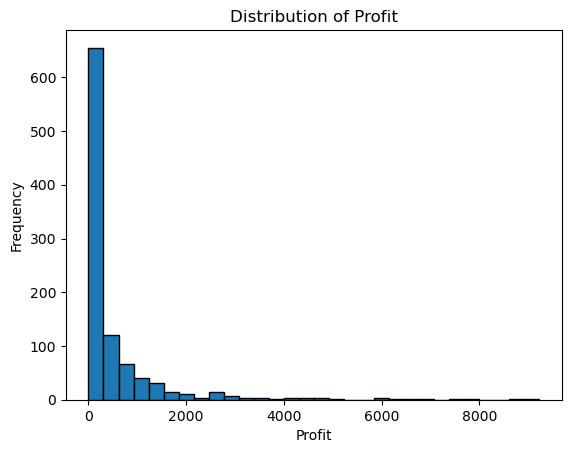

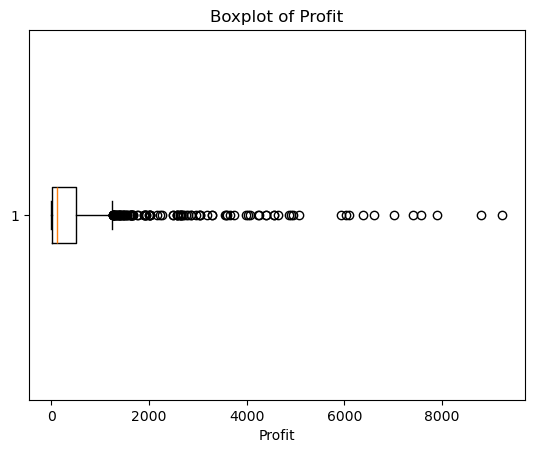

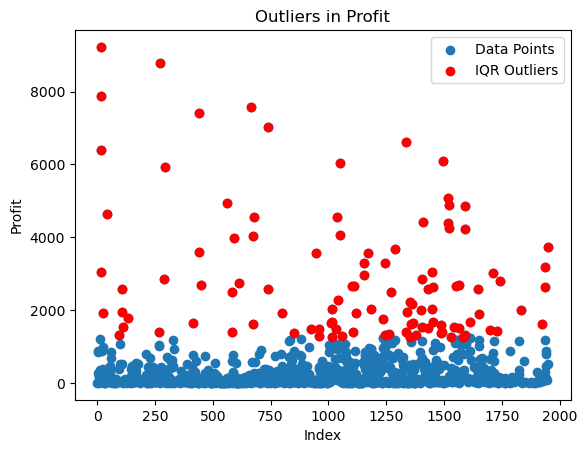

In [1204]:
# Checking and higlighting outliers
check_outliers(profit_gain, 'profit', 'Profit')
highlight_outliers(profit_gain, 'profit', 'Profit', extract_outliers(profit_gain, 'profit'))

The distribution plot showed that **the profit data distribution** was **highly skewed**.

Therefore, it was necessary for us to perform log transformation on the profit data points and re-visualize the transformed data distribution to see if it had become normal or close to it.

/var/folders/8m/d4128c8n0kg6v4lp0_h_z7b00000gn/T/ipykernel_981/3368585508.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



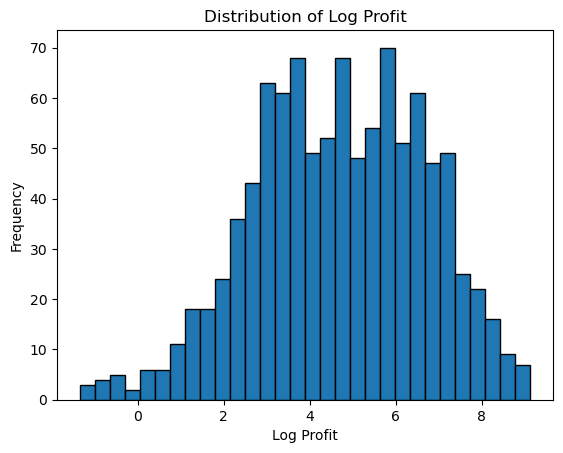

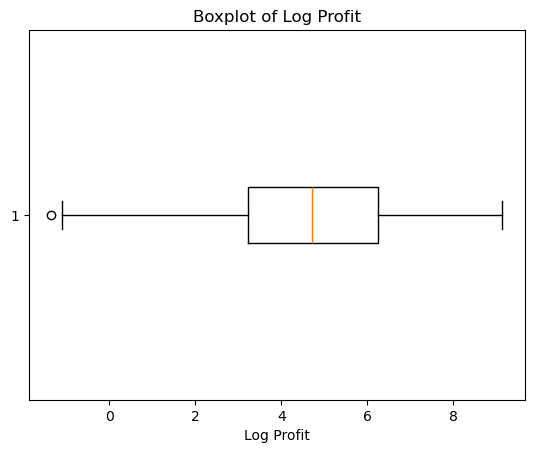

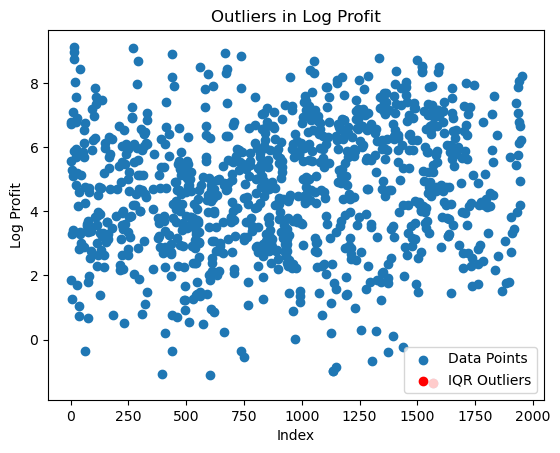

In [1205]:
profit_gain.loc[:,'log_profit'] = np.log(profit_gain.loc[:,'profit'])

check_outliers(profit_gain, 'log_profit', 'Log Profit')
highlight_outliers(profit_gain, 'log_profit', 'Log Profit', extract_outliers(profit_gain, 'log_profit'))                                      


After applying log transformation on the profit data points, the distribution plot showed that **profit data distribution** was **somewhat close to a normal data distribution**.

At this point, we were ready to conduct the ANOVA test using statsmodel's Ordinal Least Squares(OLS) to evaluate the relationship between the profit and customer segment.

In [1206]:
#for ANOVA test
import statsmodels.api as sm
from statsmodels.formula.api import ols

results = ols('log_profit ~ customer_segment', data = profit_gain).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_profit   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.317
Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.267
Time:                        15:20:28   Log-Likelihood:                -2099.8
No. Observations:                 996   AIC:                             4208.
Df Residuals:                     992   BIC:                             4227.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              4.5476      0.136     33.557      0.000       4.282       4.814
customer_segment[T.Corporate]          0.3119      0.176      1.772      0.077      -0.034       0.657
customer_segment[T.Home Office]        0.1351      0.185      0.731      0.465      -0.227       0.498
customer_segment[T.Small Business]     0.0388      0.193      0.201      0.841      -0.340       0.418
==============================================================================
Omnibus:                       17.734   Durbin-Watson:                   1.429
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.218
Skew:                          -0.210   Prob(JB):                     0.000818
Kurtosis:                       2.592   Cond. No.                         5.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From OLS regression result, we learned the **p-value (0.267 > 0.05)** suggests that **the overall model is not statistically significant**.

Therefore, we concluded that customer segments **do not** significantly impact profit.

### **Product Category**

From the product category descriptive analysis, we concluded that the **Technology** category was **responsible** for the **majority** of the profit gain.

We wanted to investigate further by finding out how are the profit different between customer segments who procuded products from the Technology category.

Our analysis into the Technology category began with totaling the profit by customer segment.

In [1207]:
# Calculating the total profit by customer segments purchasing Technology products 
most_prof_prod_cat = profit_gain[profit_gain['product_category'] == 'Technology'].pivot_table(index='customer_segment', 
                                                                                              values='profit', aggfunc='sum')

most_prof_prod_cat = round(most_prof_prod_cat,2).sort_values(by='profit',ascending=False).rename(columns={'profit':'total_profit'})

most_prof_prod_cat

,total_profit
customer_segment,
Corporate,72445.74
Home Office,48885.47
Small Business,41541.81
Consumer,40095.98


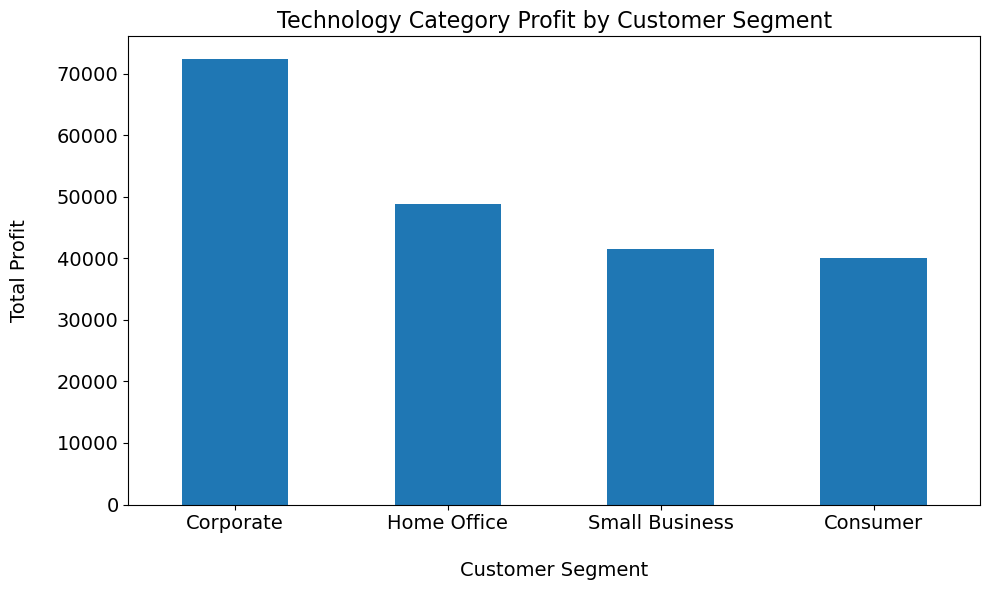

In [1208]:
# Plotting the total profit by customer segment purchasing Technology products 
most_prof_prod_cat.plot(
    kind = 'bar',
    fontsize = 14,
    figsize = [10,6],
    grid = False,
    legend=False
)
plt.title(label='Technology Category Profit by Customer Segment',fontsize=16)
plt.xticks(rotation=360)
plt.xlabel('Customer Segment',fontsize=14, labelpad=20)
plt.ylabel('Total Profit',fontsize=14, labelpad=20)
plt.tight_layout()
plt.show()

The total profit table and plot showed that **Corporate** segment accounted for the **largest profit** in terms of purchasing products under the Technology category.

The total profit generated by Corporate segment at **72445.74 USD** appeared to have a huge difference compared to the total profits generated by other customer segments which are between **40095.98 USD** and **48885.47 USD**.

To optimize profits across segments, we recommended the following improvement strategies:

**1. Expand Profitability in the Consumer Segment**

**Current Observation:** Consumer profit is the lowest among all segments.

**Possible Challenges:**
* Price sensitivity among individual buyers.
* Lack of product awareness or perceived need.
* Preference for lower-cost alternatives.
  
**Improvement Strategies:** 
* **Introduce Flexible Payment Plans:** Offer installment options or "Buy Now, Pay Later" schemes to make high-cost tech products more accessible.
* **Loyalty & Referral Programs:** Encourage repeat purchases and referrals through exclusive discounts or rewards for Consumer customers.
* **Targeted Digital Marketing:** Increase visibility via social media ads, influencer partnerships, and email campaigns focused on product benefits for individuals.
* **Bundle Smaller Tech Accessories:** Encourage upselling by offering discounted bundles (e.g., laptops with accessories like mice, keyboards, or headphones).

**2. Strengthen Small Business Engagement**

**Current Observation:** Small Business profit is lower than Corporate and Home Office segments.

**Possible Challenges:**
* Budget constraints for bulk tech purchases.
* Lack of specialized pricing for small enterprises.
* Limited awareness of productivity-enhancing tech products.

**Improvement Strategies:** 
* **Offer Small Business Tech Packages:** Curate technology bundles (e.g., laptops, printers, and software) at discounted rates for small businesses.
* **Subscription & Leasing Models:** Introduce tech-as-a-service options where small businesses can lease equipment instead of making large upfront investments.
* **Business Webinars & Training:** Provide value-added services like webinars on tech solutions for productivity, cybersecurity, or automation.
* **Exclusive B2B Discounts:** Offer tiered discounts based on volume purchases, rewarding small businesses that buy frequently.

**3. Maintain and Further Expand Corporate Segment Profitability**

**Current Observation:** Corporate segment has the highest profit contribution, making it a key driver of revenue.

**Possible Challenges:**

* Market saturation—existing corporate clients may have reached their purchase limits.
* Intense competition from specialized B2B technology vendors.

**Improvement Strategies:**
* **Strengthen Corporate Contracts:** Secure long-term procurement contracts with bulk order incentives.
* **Customized Enterprise Solutions:** Provide tailored technology solutions such as IT infrastructure, security software, and cloud storage services.
* **Premium Support Services:** Offer dedicated customer service, extended warranties, and maintenance contracts for corporate clients.
* **Cross-Sell & Upsell:** Encourage additional purchases by bundling high-end accessories and enterprise software with hardware sales.

**4. Optimize Home Office Segment Profit Growth**

**Current Observation:** The Home Office segment performs relatively well but still lags behind Corporate.

**Possible Challenges:**

* Budget constraints for freelancers and remote workers.
* Overlap with Small Business and Consumer needs.
  
**Improvement Strategies:** 
* **Remote Work Promotions:** Highlight tech products that enhance work-from-home efficiency, such as noise-canceling headphones and ergonomic office setups.
* **Subscription-Based Office Solutions:** Offer leasing options for home office technology with an easy upgrade plan.
* **Affiliate Partnerships:** Collaborate with co-working spaces or productivity influencers to boost product recommendations.
* **Energy-Efficient & Compact Tech Solutions:** Market power-saving and space-efficient technology to appeal to remote workers in limited spaces.

**5. Data-Driven Optimization Across Segments**
* Leverage customer purchase history to personalize promotions for each segment.
* Analyze profit margins by product type—if lower segments prefer cheaper products, identify ways to boost margins (e.g., premium add-ons, extended warranties).

**Final Takeaways**
* Drive consumer and small business growth through targeted pricing models, financing, and digital marketing.
* Maximize corporate dominance by securing long-term contracts and expanding service offerings.
* Boost home office sales with remote-work-friendly solutions and flexible purchasing options.
* Leverage data analytics to fine-tune customer engagement strategies per segment.

For our next analysis, we wanted to examine the relationship between profit and product category.  

We employed the ANOVA test to see if the product category attribute has significant effect towards profit.

In [1209]:
# ANOVA test
results = ols('log_profit ~ product_category', data = profit_gain).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_profit   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     64.54
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           4.45e-27
Time:                        15:20:28   Log-Likelihood:                -2040.9
No. Observations:                 996   AIC:                             4088.
Df Residuals:                     993   BIC:                             4103.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               5.2795      0.132     40.094      0.000       5.021       5.538
product_category[T.Office Supplies]    -1.2213      0.155     -7.881      0.000      -1.525      -0.917
product_category[T.Technology]          0.2257      0.176      1.285      0.199      -0.119       0.570
==============================================================================
Omnibus:                        8.789   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.735
Skew:                          -0.207   Prob(JB):                       0.0127
Kurtosis:                       2.803   Cond. No.                         4.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A very small **p-value (< 0.001)** confirms that the overall model is statistically significant.

This means that at least one of the predictor variables significantly impacts log-transformed profit which in this case the **Office Supplies** category.

### **Monthly Profit**

Based on the monthly profit trend analysis, profit gain was at its lowest in the month of March.  

We wanted to take the time to investigate March profit further by visualizing profit loss during that month by region, customer segment, and product category.

In [1210]:
# Extract the month from the datetime data points
# Filter the profit loss dataset for March only
profit_loss.loc[:,'month'] = profit_loss['order_date'].dt.month

march_profit_loss = profit_loss[profit_loss['month']==3]

# Generate Tree Map
fig = px.treemap(march_profit_loss,  
                 values="profit",
                 path=["region"],
                 title="March Profit Loss by Region")
fig.show()



/var/folders/8m/d4128c8n0kg6v4lp0_h_z7b00000gn/T/ipykernel_981/1967033793.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Regional profit loss analysis for the month of March showed that the South contributed the most loss compared to other regions.

In [1211]:
# Generate Tree Map
fig = px.treemap(march_profit_loss,  
                 values="profit",
                 path=["customer_segment"],
                 title="March Profit Loss by Customer Segment")
fig.show()

Profit loss analysis by customer segment revealed that Corporate segment accounted for the majority of profit loss in the month of March.

In [1212]:
# Generate Tree Map
fig = px.treemap(march_profit_loss,  
                 values="profit",
                 path=["product_category"],
                 title="March Profit Loss by Product Category")
fig.show()

Profit loss analysis by product category for the month of March indicated that the majority of the loss can attributed to the Technology category.

We recommended the following action plans for business improvements:

**1. Regional Profit Loss Insights**

**Key Finding:** The South and West regions show the highest profit losses.

**Actionable Steps:**

**South Region:**
* Analyze which states or cities have the highest losses.
* Assess whether discounts, high shipping costs, or product returns are driving losses.
* Strengthen marketing strategies and customer engagement in underperforming locations.

**West Region:**
* Identify loss-making product categories and adjust pricing or promotions.
* Improve logistics efficiency if high shipping costs are affecting profitability.
* Explore region-specific demand patterns and adjust inventory accordingly.

**2. Customer Segment Profit Loss Insights**

**Key Finding:** The Corporate and Consumer segments contribute the most to profit loss.

**Actionable Steps:**

**Corporate Segment:**
* Reassess large contract pricing and renegotiate terms with bulk buyers.
* Offer premium service bundles to boost margins.
* Evaluate customer return rates and implement stricter return policies if necessary.

**Consumer Segment:**
* Optimize pricing strategies to balance affordability and profitability.
* Introduce personalized promotions to increase conversion rates.
* Reduce unnecessary discounts that might be cutting into profit margins.

**Small Business & Home Office Segments:**
* Implement targeted solutions, such as small business financing options.
* Offer tech-based business solutions (e.g., software, subscriptions) to boost revenue.

**3. Product Category Profit Loss Insights**

**Key Finding:** The Technology category has the highest profit loss, followed by Furniture.

**Actionable Steps:**

**Technology:**
* Evaluate which tech products have the highest return rates or price drops.
* Shift focus toward higher-margin tech products and premium add-ons.
* Consider offering tech leasing or subscription models to stabilize revenue.

**Furniture:**
* Reduce inventory holding costs by aligning supply with regional demand.
* Optimize product design and quality to minimize returns.
* Consider offering assembly services to increase perceived value.

**Office Supplies:**
* Leverage bulk-order discounts for businesses to increase sales volume.
* Promote sustainable office supplies as an eco-friendly selling point.
* Adjust marketing strategies to boost high-margin items within this category.
  
**Final Takeaways & Strategy Adjustments**
* Focus on the South and West regions with targeted cost optimizations and demand-based adjustments.
* Improve corporate pricing strategies to prevent excessive discounting and loss-making bulk purchases.
* Reposition technology products toward high-margin or recurring revenue models.
* Optimize furniture logistics and office supply pricing to mitigate profit losses.

Shifting our focus back to profit gain, we were looking to examine the monthly profit consistency by region.

We began our analysis by calculating the total monthly profit by region.

Once the profit gain has been aggregated, we proceeded with calculating the average monthly profit, the standard deviation, and the coefficient of variance for each region.

In [1213]:
# Calculating the monthly profit for each region
monthly_reg_prof = round(profit_gain.pivot_table(index='month', columns='region', values='profit', aggfunc='sum'),2)

monthly_reg_prof

region,Central,East,South,West
month,,,,
1,25922.78,11096.53,14218.34,25212.24
2,24932.46,9093.29,5629.84,37614.02
3,17974.08,22783.60,9929.71,21410.29
4,19340.24,48263.21,20633.53,19982.53
5,27336.75,23265.67,7577.51,31083.72
6,29066.41,33788.24,6444.66,22925.99


In [1214]:
# Calculating the average monthly profit, standard deviation, and coefficient of variance for each region
for region in list(monthly_reg_prof.columns):
    mean_profit = round(np.mean(monthly_reg_prof[region]),4)
    std_dev = round(np.std(monthly_reg_prof[region], ddof=1),4)
    cv = round((std_dev / mean_profit) * 100, 4)
    print(f"Region: {region}")
    print(f"Mean Profit: {mean_profit}")
    print(f"Standard Deviation: {std_dev}") 
    print(f"Coefficienct of Variance: {cv}\n")


Region: Central
Mean Profit: 24095.4533
Standard Deviation: 4457.3396
Coefficienct of Variance: 18.4987

Region: East
Mean Profit: 24715.09
Standard Deviation: 14643.5876
Coefficienct of Variance: 59.2496

Region: South
Mean Profit: 10738.9317
Standard Deviation: 5748.0844
Coefficienct of Variance: 53.5257

Region: West
Mean Profit: 26371.465
Standard Deviation: 6741.6206
Coefficienct of Variance: 25.5641



Our interpretations on the regional profit consistency analysis are as follows;

**Central Region**

Interpretation:

- Moderate inconsistency in profit.
- Some fluctuations but not extreme.
- Relatively stable compared to other regions.

**East Region**

Interpretation:

- Highest inconsistency among all regions.
- Very high standard deviation relative to the mean indicates extreme profit fluctuations.
- This region might be experiencing high market volatility, irregular sales trends, or operational inefficiencies.
- Requires deeper investigation into factors causing instability.

**South Region**

Interpretation:

- Very inconsistent profit trends, similar to the East region.
- High fluctuations suggest instability in revenue or costs.
- The low mean profit and high CV indicate a risk-prone region, potentially due to low demand or unpredictable costs.
- Needs strategies to improve stability, such as better inventory management or marketing efforts.

**West Region**

Interpretation:

- Moderate inconsistency—higher than Central but lower than East and South.
- Profit fluctuates, but it is not as unstable as in the East or South regions.
- Room for improvement in profit consistency.

**Overall Comparison:**

| Region  | Mean Profit | Standard Deviation | Coefficient of Variation (CV) | Stability Level |
|---------|------------|--------------------|------------------------------|------------------|
| **Central** | 24,095.45  | 4,457.34  | **18.50%**  | **Most stable** |
| **West**    | 26,371.47  | 6,741.62  | **25.56%**  | **Moderate stability** |
| **South**   | 10,738.93  | 5,748.08  | **53.53%**  | **Highly inconsistent** |
| **East**    | 24,715.09  | 14,643.59 | **59.25%**  | **Most inconsistent** |

**Final Insights:**
- Central Region has the most stable profits.
- East Region is the most unstable, needing immediate action to reduce profit fluctuations.
- South Region also experiences high volatility and requires stability measures.
- West Region is somewhat inconsistent but not as extreme as East or South.

Furthermore, we were also looking to probe into the relationship between the order month and profit.

In [1215]:
from scipy.stats import pearsonr

# Correlation between month and profit
correlation, p_value = pearsonr(profit_gain['month'], profit_gain['profit'])
print(f"Correlation: {correlation}, P-value: {p_value}")

Correlation: 0.025302402804347084, P-value: 0.42507054211621254


Our interpretations on the analysis result are as follows: 

- Correlaton analysis showed a very low positive correlation between month and profit variable. 
- P-value greater than 0.05 suggested no evidence that the month variable has signicant impact on the profit variable.
- This indicates that there is no relationship between month and profit

## **7. Predictive Analysis**

We began our predictive analysis by preparing the data to be passed on to the machine learning models of our choosing. 

In this case, the models were Random Forest Classifier to forecast whether a transaction was profitable or not and Random Forest Regressor to forecast the actual profit value in a trasanction.

The steps for the data preparation are as follows:

* Performed a log transformation on all the numerical values in our dataset to ensure high accuracy for our models. Since there were negative values in the profit data points and log transformation could not be done on them, we converted all the negative values into zeros first.

In [1216]:
# Converting negative values to 0s
super_store_df.loc[super_store_df['profit'] < 0, 'profit'] = 0

* Added a profit gain column to our dataset in preparation to predict profit gain or loss.

In [1217]:
# Adding a new column indicating profit gain or loss
super_store_df.loc[super_store_df['profit'] > 0, 'profit_gain'] = 'Yes'
super_store_df.loc[super_store_df['profit'] == 0, 'profit_gain'] = 'No'

* Added a processing time column to our dataset to capture the amount time needed to process a customer order from the time he/she placed an order to the time when it was shipped. 

In [1218]:
super_store_df.loc[:,'processing_time'] = super_store_df['ship_date'] - super_store_df['order_date']
super_store_df.loc[:,'processing_time'] = super_store_df['processing_time'].dt.days

* Selected only the numerical columns for the log transformation and adding 1 to all the values to prevent log(0) error.

In [1219]:
# Select numerical columns
numerical_cols = super_store_df.select_dtypes(include=['number']).columns

# Apply log transformation (add 1 to avoid log(0) error)
super_store_df[numerical_cols] = np.log1p(super_store_df[numerical_cols]+1)

* Dropped all the columns that we deemed unnecessary for the analysis.

In [1220]:
# Dropping unnecessary columns
cols_drop = ['customer_name','customer_id','row_id','product_name','postal_code','country','order_date','ship_date','order_id']

super_store_df.drop(columns=cols_drop, inplace=True)

* Encoded all the categorical columns in our dataset.

In [1221]:
from sklearn.preprocessing import LabelEncoder

# Select only categorical columns
categorical_cols = super_store_df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    super_store_df[col] = le.fit_transform(super_store_df[col])  # Transform and store back

* Calculated the Chi-Square score for each of the predictors to see which ones will be significant for our forecasting and select them accordingly.

In [1222]:
from sklearn.feature_selection import chi2

# Compute chi2 scores
chi_scores, p_values = chi2(super_store_df.drop(columns=['profit_gain']), super_store_df['profit_gain'])
selected_features = super_store_df.columns[np.where(p_values < 0.05)]  # Select significant features

print(selected_features)

Index(['unit_price', 'shipping_cost', 'product_container', 'state_or_province',
       'city', 'profit', 'quantity', 'sales'],
      dtype='object')


* Filtered our dataset to include only predictors that have significant impact towards profit gain or loss.

In [1223]:
#Filter the data set to include only the significant predictors
feat_targ_ls = list(selected_features)

feat_targ_ls.append('profit_gain')

ml_df = super_store_df[feat_targ_ls]

Once we were done with our data preparation task, we proceeded with training the Random Forest Classifier and Regressor model to forecast the profit gain status and value respectively.

The steps to train the Random Forest Classifier model and make prediction on profit gain status are as follows:

* Splitted the data set into predictors and target variable for training and testing.

In [1224]:
from sklearn.model_selection import train_test_split

# Splitting the dataset to predictors and target variable for training and testing
X = ml_df.drop(columns=['profit_gain','profit'])
y = ml_df['profit_gain']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

* Scaled the training and testing predictors.

In [1225]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Apply transformation
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

* Trained the model using the training data and made prediction on the profit gain using the test data

In [1226]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier 

# Training the Random Forest Classifier model
rfclmod = RandomForestClassifier()
rfclmod.fit(X_train, y_train)

y_hat = rfclmod.predict(X_test)

Once we were done training the Random Forest Classifier model and forecasting the profit gain status, we generated several performance metrics to to evaluate the model's accuracy.

First, we assessed the model's performance via a confusion matrix. 

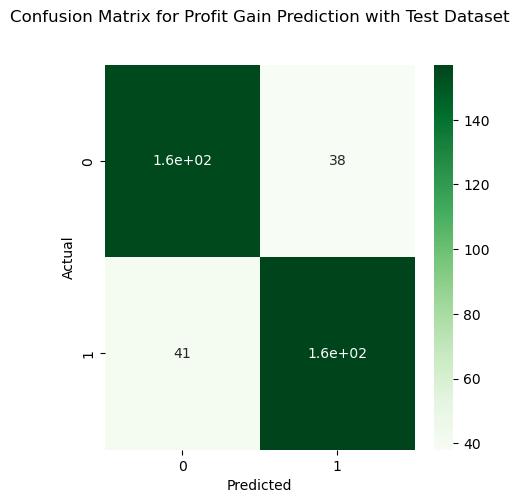

In [1227]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_hat)
fig, ax = plt.subplots(figsize=(5,5))
ax2 = sns.heatmap(conf_mat, annot=True, ax=ax, cmap='Greens')
ax2.set_title('Confusion Matrix for Profit Gain Prediction with Test Dataset\n\n')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
plt.show()

The break down of the confusion matrix is as follows:

|Actual \ Predicted | Predicted 0 (No Profit Gain)| Predicted 1 (Profit Gain)|
|-------------------|-----------------------------|--------------------------|
|Actual 0 (No Profit Gain) | 160 (True Negatives - TN)|	38 (False Positives - FP)|
|Actual 1 (Profit Gain) | 41 (False Negatives - FN)	| 160 (True Positives - TP) |

* **True Negatives (TN) = 160** → Model correctly predicted cases where there was no profit gain.
* **False Positives (FP) = 38** → Model incorrectly predicted profit gain when there was actually no gain (Type I Error).
* **False Negatives (FN) = 41** → Model incorrectly predicted no profit gain when there was actually a gain (Type II Error).
* **True Positives (TP) = 160** → Model correctly predicted cases where there was profit gain.

From what we learned about the matrix, it would seemed that the Random Forest Classifier model **accurately predict most** of the **profit gain (True Positive)** and **loss (True Negative)**.

Second, we gauged the model's performance via a classification report.

In [1228]:
from sklearn.metrics import accuracy_score, confusion_matrix, RocCurveDisplay, classification_report

# Classification report
cr = classification_report(y_test, y_hat)
print('Accuracy Report with Test Data\n')
print(cr + '\n')

Accuracy Report with Test Data

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       193
           1       0.81      0.79      0.80       198

    accuracy                           0.80       391
   macro avg       0.80      0.80      0.80       391
weighted avg       0.80      0.80      0.80       391




The breakdown of the report is as follows:

| Class (Label) | Precision | Recall | F1-Score	| Support (# of Samples) |
|---------------|-----------|--------|----------|------------------------|
| 0 (Negative Class) | 0.79 | 0.80 | 0.80 | 193 |
| 1 (Positive Class) | 0.81 | 0.79 | 0.80 | 198 |

**Precision (How often is a positive/negative prediction correct?)**

* **Class 0 (No Profit Gain):** **79% of the times** the model predicts **class 0**, it's correct.
* **Class 1 (Profit Gain):** **81% of the times** the model predicts **class 1**, it's correct.

**Recall (How well does the model capture all true cases?)**

* **Class 0 (No Profit Gain):** **80% of actual "0" cases** were correctly identified.
* **Class 1 (Profit Gain):** **79% of actual "1" cases** were correctly identified.

**F1-Score (Harmonic mean of precision & recall)**

* **Class 0: 0.80** (Balanced between precision & recall).
* **Class 1: 0.80** (Same balance).

**Conclusion:** The model performs equally well in both classes, meaning it does not favor one class over the other.

Third, we observed the ROC AUC curve from the predictions to gauge the model's discriminatory power.

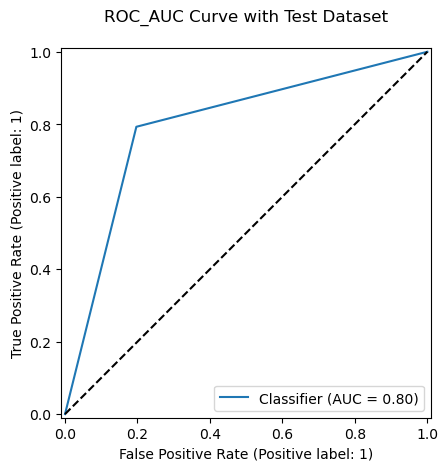

In [1229]:
RocCurveDisplay.from_predictions(y_test, y_hat)
plt.title('ROC_AUC Curve with Test Dataset\n')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

**AUC (Area Under the Curve) = 0.80** indicates that the Random Forest Classifier model has good discriminatory power.

Lastly, we observed the ROC AUC curve from the estimator to measure the model's discriminatory power.

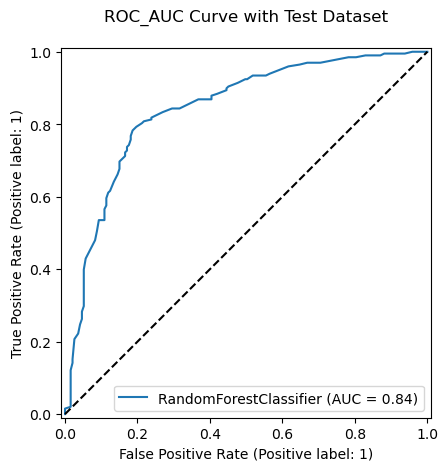

In [1230]:
RocCurveDisplay.from_estimator(rfclmod, X_test, y_test)
plt.title('ROC_AUC Curve with Test Dataset\n')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

**AUC = 0.84** indicates that the Random Forest Classifier model has a strong ability to distinguish between profit gain and profit loss cases.

Even though the Random Forest Classifier model performed relatively well, we felt that there were room for improvements.  Potential area for improvements in the near future would be finetuning the model's hyper-parameters, performing feature engineering, and experimenting with other classifier models.

## **8. Conclusions**

We started the profit analysis project to supply Super Store the means to review their 6-month worth of transaction data and unearth profit trends from their data for a more strategized decision making.  The analysis was divided into descriptive, diagnostic, and predictive.  

For the descriptive analysis, we delved into their maximum and minimum profit to find out if there are profit loss occurring in the period of 6 months.  We discovered that there were several transactions resulted in profit loss and decided to split Super Store’s dataset into profit gain and profit loss. 

Looking into profit gain from the customer segment perspective, we learned that the Corporate segment was responsible for the highest profit gain while Small Business segment was responsible for the lowest.  As for next steps, we recommended coverage and marketing efforts expansion for the Consumers segment, strengthen Home Office and Small Business segments, maintain and optimize Corporate segment, explore geographic expansion, optimize pricing and margins, and improve customer experience.

From the product category perspective, we learned that the Technology contributed the most profit gain compared to the Office Supplies and Furniture.  As for next steps, we recommended strengthening Technology category by maintaining growth and market share, boosting Office Supplies profitability by increasing sales volume, adjusting marketing budget allocation, and exploring new channels for promotion.

From the monthly profit trend, we learned that total profit went below average from January to March, which is the lowest in March, and above average from April up to June.  For next steps, we investigated further into the month March by learning the profit loss that had occurred during that month.

For the diagnostic analysis, we compared overall profit gain and profit loss to see which one was greater.  Even though profit gain was greater than profit loss for the last 6 month, it was worth looking further into the factors contributing to profit loss.  We determined, from the perspective of the product category, that Technology contributed to the majority of the profit loss compared to the Furniture and Office Supplies.  
From the perspective of the product sub-categories, we learned that Office Machines, Tables, and Storage & Organization contributed the largest loss for Technology, Furniture, and Office Supplies respectively.  We recommended improvement strategies surrounding focus on bundling, leasing models, and supplier cost optimizations for Technology category, revamp of inventory control, service offerings, and pricing strategies for Furniture category, and implementation of bulk pricing, sustainability initiatives, and supplier cost reduction strategies.

From the customer segment perspective, we learned that Corporate was responsible for the highest profit for East, South, and West regions while Home Office contributed the highest profit in Central region.  As for improvement strategy, we recommended enhancing Consumer profitability in Central and East regions, strengthening Small Business engagement in South and West regions, leveraging Corporate dominance in all the regions, and boosting Home Office segment in the West region.  We also learned that customers belonging to either Corporate, Small Business, Home Office, or Consumer had no significant impact towards Super Store’s profit gain or profit loss.

From the product category perspective, we learned from our descriptive analysis that Technology had the highest contribution towards profit gain.  Delving further into the Technology category, we determined that the Corporate segment had the largest estate in terms of profit gain by a significant margin compared to Home Office, Small Business, and Consumer segments.  As for improvement strategies, we recommended expansion of profitability for the Consumer segment, strengthening Small Business engagement, maintaining and further expanding Corporate segment profitability, optimizing Home Office segment profit growth, and focusing on data-driven optimization across segments.  We also learned that at least one of the product categories, in this case Office Supplies, had significant effect to profit gain.
